<a href="https://colab.research.google.com/github/Rigved19/Machine-Learning-Projects/blob/main/Carnot_Clustering_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans , MeanShift , DBSCAN
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [243]:
data = pd.read_csv ("/content/unlabelled_data.csv")

In [244]:
data.head()

,Id,Speed,RPM,Engine Load
0,131505,7,898,44
1,133384,7,898,44
2,131504,1,917,32
3,133424,1,917,32
4,131503,0,774,38


In [245]:
## Data Cleaning
df = data[data["Speed"] != 0]   #Deleting Rows with Speed Value as 0

In [246]:
for x in range(df.shape[0]):     #Frontfilling RPM = 0 values
  if df.iloc[x]["RPM"] == 0:
    df.iloc[x]["RPM"] = df.iloc[x-1]["RPM"]  

a = df[df["Engine Load"] == 0 ].index
df.drop(a , axis = 0 , inplace = True)     

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [247]:
##Deleting Rows having RPM Values lower than 1000
idx = df[df["RPM"] < 1000].index
df1 = df.drop( idx, axis = 0)

idx =  df1[df1["RPM"] > 2500].index
df1 = df1.drop (idx , axis = 0)

idx = df1[df1["Speed"] > 90].index
df1 = df1.drop (idx , axis = 0)

In [248]:
count  = df1[df1["RPM"] < 1000]
print(count)

Empty DataFrame
Columns: [Id, Speed, RPM, Engine Load]
Index: []


In [249]:
train = df1
x = train["Speed"].to_numpy()
y = train["RPM"].to_numpy()
X = train.iloc[:,[1,2]].values

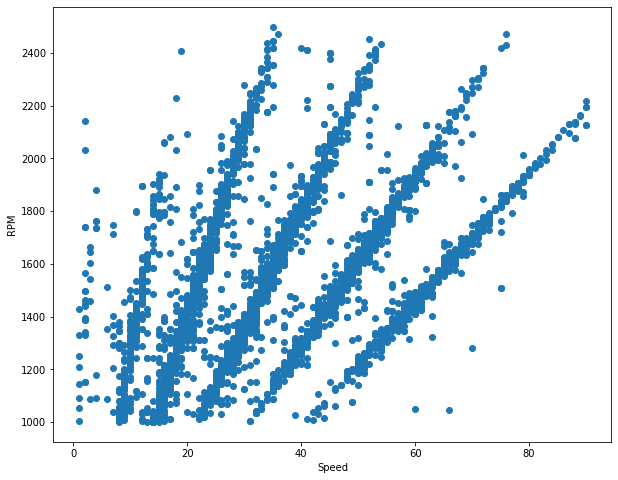

In [250]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x , y)
plt.show()

In [251]:
## Scaling the Data
y_reshaped = y.reshape(-1,1)
x_reshaped = x.reshape(-1,1)
Standard = StandardScaler()
MinMax1 = MinMaxScaler(feature_range = (0.001,1))
y_scaled = MinMax1.fit_transform(y_reshaped)
MinMax2 = MinMaxScaler(feature_range = (0.001,1))
x_scaled = MinMax2.fit_transform(x_reshaped)
X_scaled = np.concatenate( (x_scaled , y_scaled) , axis = 1)  
#y_scaled= Standard.fit_transform(y_reshaped)
#x_scaled= Standard.fit_transform(x_reshaped)

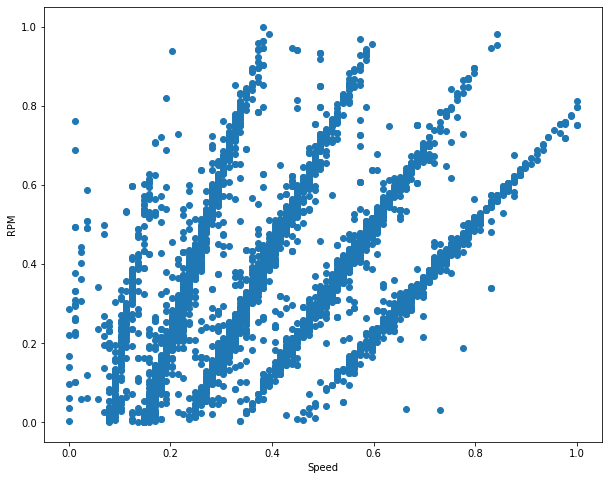

In [252]:
plt.figure(figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled)
plt.show()

In [253]:
## Using Kmeans
kmeans = KMeans(n_clusters=6 , random_state = 0)
y_kmeans1 = kmeans.fit_predict(X_scaled)
print (y_kmeans1)

[3 3 1 ... 3 3 3]


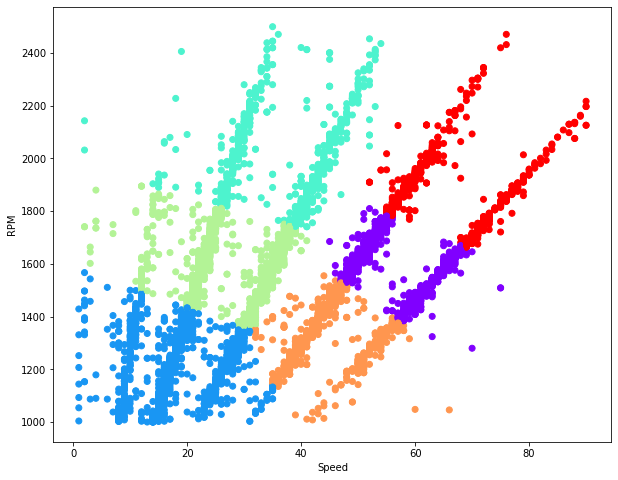

In [254]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x , y , c = y_kmeans1, cmap="rainbow")

In [255]:
##Using MeanShift
ms = MeanShift(bandwidth = 0.1 , max_iter =300 , cluster_all = True)
y_mean = ms.fit_predict(X_scaled)
print (y_mean)
cluster_centers = ms.cluster_centers_
labels = ms.labels_
n_cluster = len(np.unique(labels)) 
print("No. of clusters", n_cluster)
print("Cluster Centres", cluster_centers )

[3 3 0 ... 3 3 3]
No. of clusters 8
Cluster Centres [[0.25582015 0.22554886]
 [0.52449746 0.35686247]
 [0.68175871 0.33430732]
 [0.37745717 0.37913627]
 [0.0312204  0.46018138]
 [0.69693258 0.032302  ]
 [0.01222472 0.725275  ]
 [0.20304494 0.937396  ]]


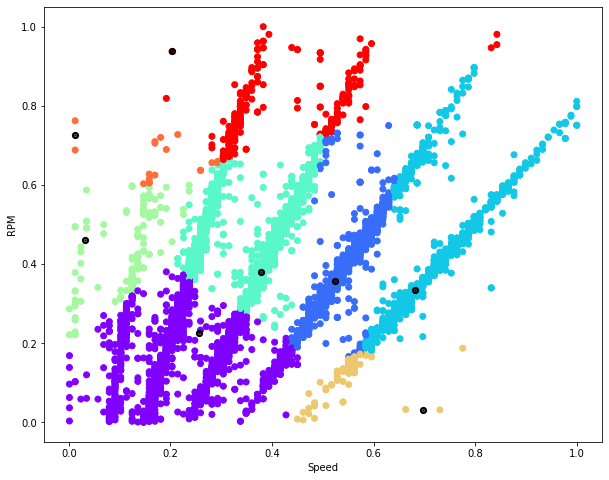

In [256]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = y_mean, cmap="rainbow")
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = ".", color = 'k', s = 20, linewidths = 5, zorder = 10)

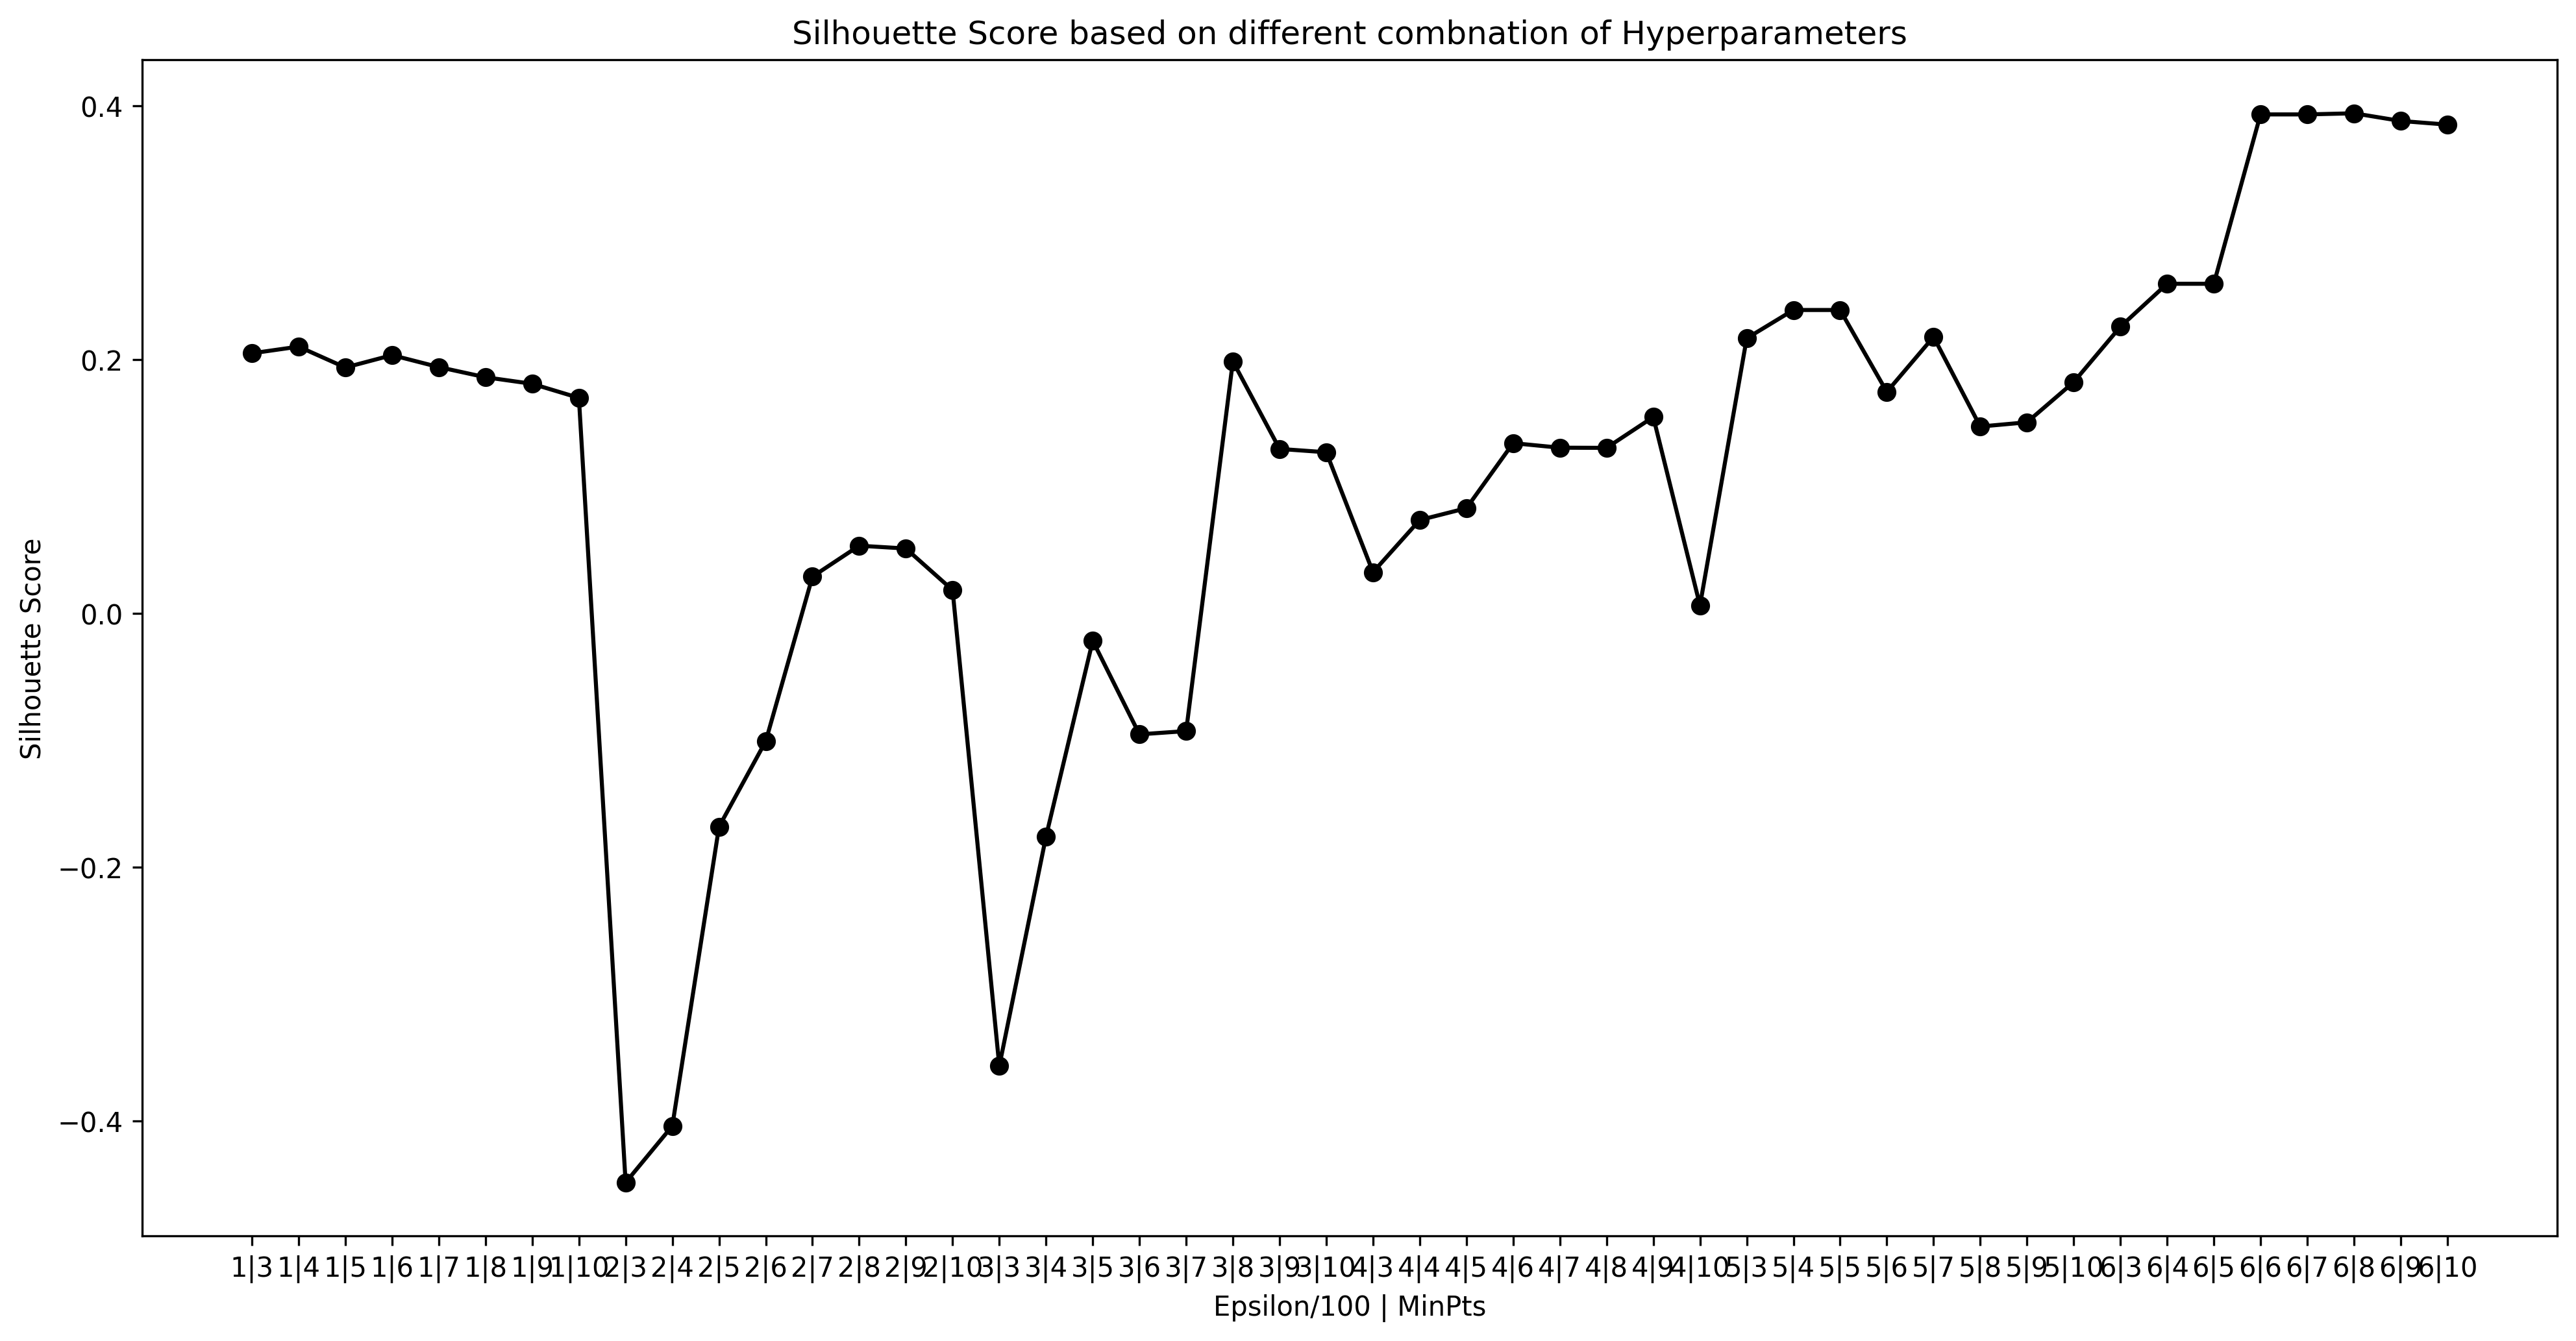

In [257]:
from sklearn import metrics

# Create empty lists
S=[] # this is to store Silhouette scores
comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(1,7) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,11)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(X_scaled)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X_scaled, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

In [281]:
###Taking  eps/min = 0.11/5 and eps/min 0.12/7

model1 = DBSCAN(eps = 0.028 , min_samples=12)

clusters1 = model1.fit_predict(X_scaled)
n_clusters1 = len(set(clusters1))
print("Model1 Clusters" , clusters1)
print("No. of clusters" , n_clusters1)
model2 = DBSCAN(eps= 0.017 , min_samples = 7)

clusters2 = model2.fit_predict(X_scaled)
n_clusters2 = len(set(clusters2))
print("Model2 Clusters" , clusters2)
print("No. of clusters" , n_clusters2)


Model1 Clusters [0 0 0 ... 0 2 2]
No. of clusters 8
Model2 Clusters [ 0  0 -1 ...  0  4  4]
No. of clusters 17


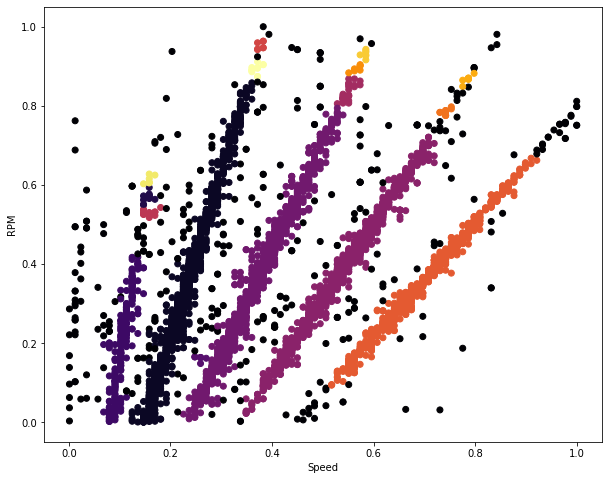

In [279]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = clusters2, cmap="inferno")

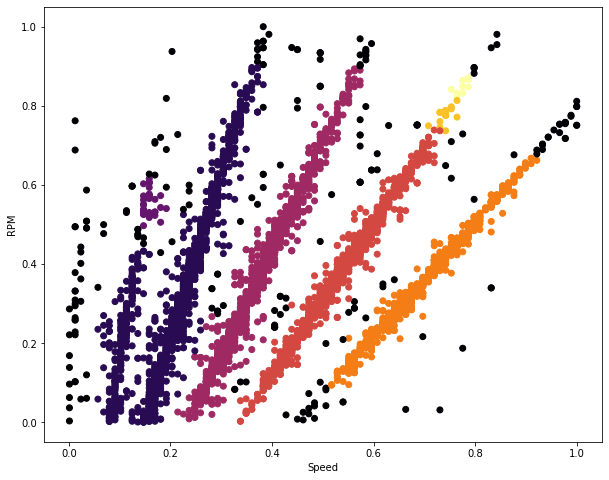

In [282]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = clusters1, cmap="inferno")
#plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = ".", color = 'k', s = 20, linewidths = 5, zorder = 10)

In [ ]:
axis = np.zeros(train.shape[0])
ratio = np.divide(y_scaled[:,0] , x_scaled[:,0])
plt.scatter(ratio , axis)
plt.show()
ratio = ratio.reshape(-1 , 1)

In [ ]:
plt.scatter(ratio , axis , c=y_kmeans1 , cmap = "rainbow")

In [ ]:
from sklearn.cluster import DBSCAN

model1 = DBSCAN(eps=0.011, min_samples=2)
# fit model and predict clusters
yhat = model1.fit_predict(ratio)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

In [ ]:
#Data Visualisation
xdata = data.iloc[:500]["Speed"].to_numpy()
ydata = data.iloc[:500]["RPM"].to_numpy()
zdata = data.iloc[:500]["Engine Load"].to_numpy()

fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(xdata, ydata, zdata , c = "Green" )
# Give labels
ax.set_xlabel('Speed')
ax.set_ylabel('RPM')
ax.set_zlabel('Engine Load')
